In [314]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt

In [315]:
crash_df = pd.read_csv(r"C:\Users\GosiaW\Desktop\Capstone_project\data\Collisions.csv")

C:\Users\GosiaW\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [316]:
df=crash_df.drop(columns=['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'ST_COLCODE','ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'SDOTCOLNUM'])

In [317]:
ped_df=df.loc[df['COLLISIONTYPE'] == 'Pedestrian']

In [318]:
ped_df_tree=ped_df.drop(columns=['LOCATION','ADDRTYPE','COLLISIONTYPE','FATALITIES','INCDATE', 'INCDTTM','JUNCTIONTYPE','INATTENTIONIND','SPEEDING'])

In [319]:
ped_df_tree.dropna()
ped_df_tree.head()

,SEVERITYCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT
1,2,0,Overcast,Dry,Dark - Street Lights On,NaN
29,2,0,Raining,Wet,Daylight,Y
33,2,N,Raining,Wet,Dark - Street Lights On,NaN
38,2,0,Overcast,Wet,Dark - Street Lights On,NaN
106,2,N,Overcast,Wet,Dark - Street Lights On,NaN


In [320]:
ped_df_tree.describe()

,SEVERITYCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT
count,7666,7665,7654,7659,7655,3261
unique,5,4,10,8,9,1
top,2,N,Clear,Dry,Daylight,Y
freq,6006,4503,4447,5022,4431,3261


In [321]:
df=ped_df_tree[ped_df_tree.WEATHER != 'Unknown']

In [322]:
df1=df[df.ROADCOND != 'Unknown']

In [323]:
df2=df1[df1.LIGHTCOND != 'Unknown']

In [324]:
df2['UNDERINFL'].replace({'N': '0', 'Y': '1'}, inplace=True)

C:\Users\GosiaW\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [325]:
df2['PEDROWNOTGRNT']=df2['PEDROWNOTGRNT'].fillna('No')
df2['PEDROWNOTGRNT'].replace({'Y': 'Yes'}, inplace=True)

C:\Users\GosiaW\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [326]:
df2.head()

,SEVERITYCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT
1,2,0,Overcast,Dry,Dark - Street Lights On,No
29,2,0,Raining,Wet,Daylight,Yes
33,2,0,Raining,Wet,Dark - Street Lights On,No
38,2,0,Overcast,Wet,Dark - Street Lights On,No
106,2,0,Overcast,Wet,Dark - Street Lights On,No


In [327]:
df2.shape

(7392, 6)

In [328]:
df2.describe()

,SEVERITYCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT
count,7392,7391,7380,7385,7381,7392
unique,5,2,9,7,8,2
top,2,0,Clear,Dry,Daylight,No
freq,5791,6833,4411,4979,4346,4264


In [329]:
df3=df2.dropna()

In [330]:
df3.shape

(7373, 6)

In [331]:
df3.describe()

,SEVERITYCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT
count,7373,7373,7373,7373,7373,7373
unique,5,2,9,7,8,2
top,2,0,Clear,Dry,Daylight,No
freq,5778,6816,4406,4969,4345,4247


In [332]:
#df3['ADDRTYPE'].value_counts()

In [333]:
df3['SEVERITYCODE'].value_counts()

2     5778
2b     825
1      641
3      128
0        1
Name: SEVERITYCODE, dtype: int64

In [334]:
df3['UNDERINFL'].value_counts()

0    6816
1     557
Name: UNDERINFL, dtype: int64

In [335]:
df3['WEATHER'].value_counts()

Clear                       4406
Raining                     1813
Overcast                    1093
Snowing                       24
Fog/Smog/Smoke                19
Other                         10
Sleet/Hail/Freezing Rain       6
Blowing Sand/Dirt              1
Severe Crosswind               1
Name: WEATHER, dtype: int64

In [336]:
df3['PEDROWNOTGRNT'].value_counts()

No     4247
Yes    3126
Name: PEDROWNOTGRNT, dtype: int64

In [337]:
df4=df3[df3.SEVERITYCODE != '0']

In [338]:
df4['SEVERITYCODE'].value_counts()

2     5778
2b     825
1      641
3      128
Name: SEVERITYCODE, dtype: int64

In [339]:
df4['WEATHER'].value_counts()

Clear                       4405
Raining                     1813
Overcast                    1093
Snowing                       24
Fog/Smog/Smoke                19
Other                         10
Sleet/Hail/Freezing Rain       6
Blowing Sand/Dirt              1
Severe Crosswind               1
Name: WEATHER, dtype: int64

In [340]:
df4["WEATHER"].replace({"Fog/Smog/Smoke": "Other", "Sleet/Hail/Freezing Rain": "Other", "Severe Crosswind":"Other", "Blowing Sand/Dirt":"Other"}, inplace=True)

In [341]:
df4['WEATHER'].value_counts()

Clear       4405
Raining     1813
Overcast    1093
Other         37
Snowing       24
Name: WEATHER, dtype: int64

In [342]:
df4['ROADCOND'].value_counts()

Dry               4969
Wet               2357
Snow/Slush          26
Ice                 14
Other                2
Standing Water       2
Sand/Mud/Dirt        2
Name: ROADCOND, dtype: int64

In [343]:
df4["ROADCOND"].replace({"Sand/Mud/Dirt": "Other", "Standing Water": "Other"}, inplace=True)

In [344]:
df4['ROADCOND'].value_counts()

Dry           4969
Wet           2357
Snow/Slush      26
Ice             14
Other            6
Name: ROADCOND, dtype: int64

In [345]:
df4['LIGHTCOND'].value_counts()

Daylight                    4344
Dark - Street Lights On     2487
Dusk                         254
Dawn                         158
Dark - No Street Lights       62
Dark - Street Lights Off      57
Other                          7
Dark - Unknown Lighting        3
Name: LIGHTCOND, dtype: int64

In [346]:
df4["LIGHTCOND"].replace({"Dark - Street Lights On": "Street Lights", "Dark - No Street Lights": "Dark", "Dark - Street Lights Off":"Dark", "Dark - Unknown Lighting":"Dark"}, inplace=True)

In [347]:
df4['LIGHTCOND'].value_counts()

Daylight         4344
Street Lights    2487
Dusk              254
Dawn              158
Dark              122
Other               7
Name: LIGHTCOND, dtype: int64

In [348]:
df4['SEVERITYCODE'].value_counts()

2     5778
2b     825
1      641
3      128
Name: SEVERITYCODE, dtype: int64

In [349]:
df5=df4[df4.WEATHER != 'Other']

In [350]:
df6=df5[df5.ROADCOND != 'Other']

In [351]:
df7=df6[df6.LIGHTCOND != 'Other']

In [352]:
df7['SEVERITYCODE'].value_counts()

2     5741
2b     822
1      633
3      127
Name: SEVERITYCODE, dtype: int64

In [353]:
df7["SEVERITYCODE"].replace({"3":"2","2b": "2", "2": "1", "1":"0"}, inplace=True)

In [354]:
df7["WEATHER"].replace({"Clear": "0", "Raining":"2", "Overcast":"1", "Snowing":"3" }, inplace=True)

In [355]:
df7["ROADCOND"].replace({"Dry": "0", "Wet":"1", "Snow/Slush":"2", "Ice":"3" }, inplace=True)

In [356]:
df7["LIGHTCOND"].replace({"Daylight": "0", "Street Lights":"1", "Dusk":"2", "Dawn":"3", "Dark":"4"}, inplace=True)

In [357]:
df7["PEDROWNOTGRNT"].replace({"No": "0", "Yes": "1"}, inplace=True)

In [358]:
df7.shape

(7323, 6)

In [359]:
df8=df7.sort_values(['SEVERITYCODE'], ascending=False) 
df8.tail()

,SEVERITYCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT
36581,0,1,2,1,1,0
133772,0,0,0,0,0,0
179393,0,0,0,0,0,0
79653,0,0,2,1,0,1
70567,0,1,0,0,0,0


In [360]:
df8['SEVERITYCODE'].value_counts()

1    5741
2     949
0     633
Name: SEVERITYCODE, dtype: int64

<h1> Unbalanced decision tree </h1>

In [361]:
df_unbalanced=df8

In [362]:
X_unb=df_unbalanced[['UNDERINFL', 'WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT']].values
X_unb[0:5]

array([['1', '1', '0', '0', '0'],
       ['1', '1', '0', '1', '0'],
       ['0', '1', '1', '2', '0'],
       ['0', '0', '0', '1', '0'],
       ['0', '2', '1', '0', '1']], dtype=object)

In [363]:
y_unb = df_unbalanced["SEVERITYCODE"]
y_unb[0:5]

221508    2
98197     2
194530    2
194633    2
41190     2
Name: SEVERITYCODE, dtype: object

In [364]:
X_unb_trainset, X_unb_testset, y_unb_trainset, y_unb_testset = train_test_split(X_unb, y_unb, test_size=0.3, random_state=3)

In [365]:
print("Size of the X_unb_trainset:", X_unb_trainset.shape)
print("Size od the y_unb_trainset:", y_unb_trainset.shape)
print("Size of the X_unb_testset:", X_unb_testset.shape)
print("Size od the y_unb_testset:", y_unb_testset.shape)

Size of the X_unb_trainset: (5126, 5)
Size od the y_unb_trainset: (5126,)
Size of the X_unb_testset: (2197, 5)
Size od the y_unb_testset: (2197,)


In [366]:
crashTree_unbalanced = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
crashTree_unbalanced

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [367]:
crashTree_unbalanced.fit(X_unb_trainset,y_unb_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [368]:
predTree_unbalanced = crashTree_unbalanced.predict(X_unb_testset)

In [369]:
print (predTree_unbalanced [0:5])
print (y_unb_testset [0:5])

['1' '1' '1' '1' '1']
94281     1
113664    1
73309     0
169124    1
119958    1
Name: SEVERITYCODE, dtype: object


In [370]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_unb_testset, predTree_unbalanced))

DecisionTrees's Accuracy:  0.7869822485207101


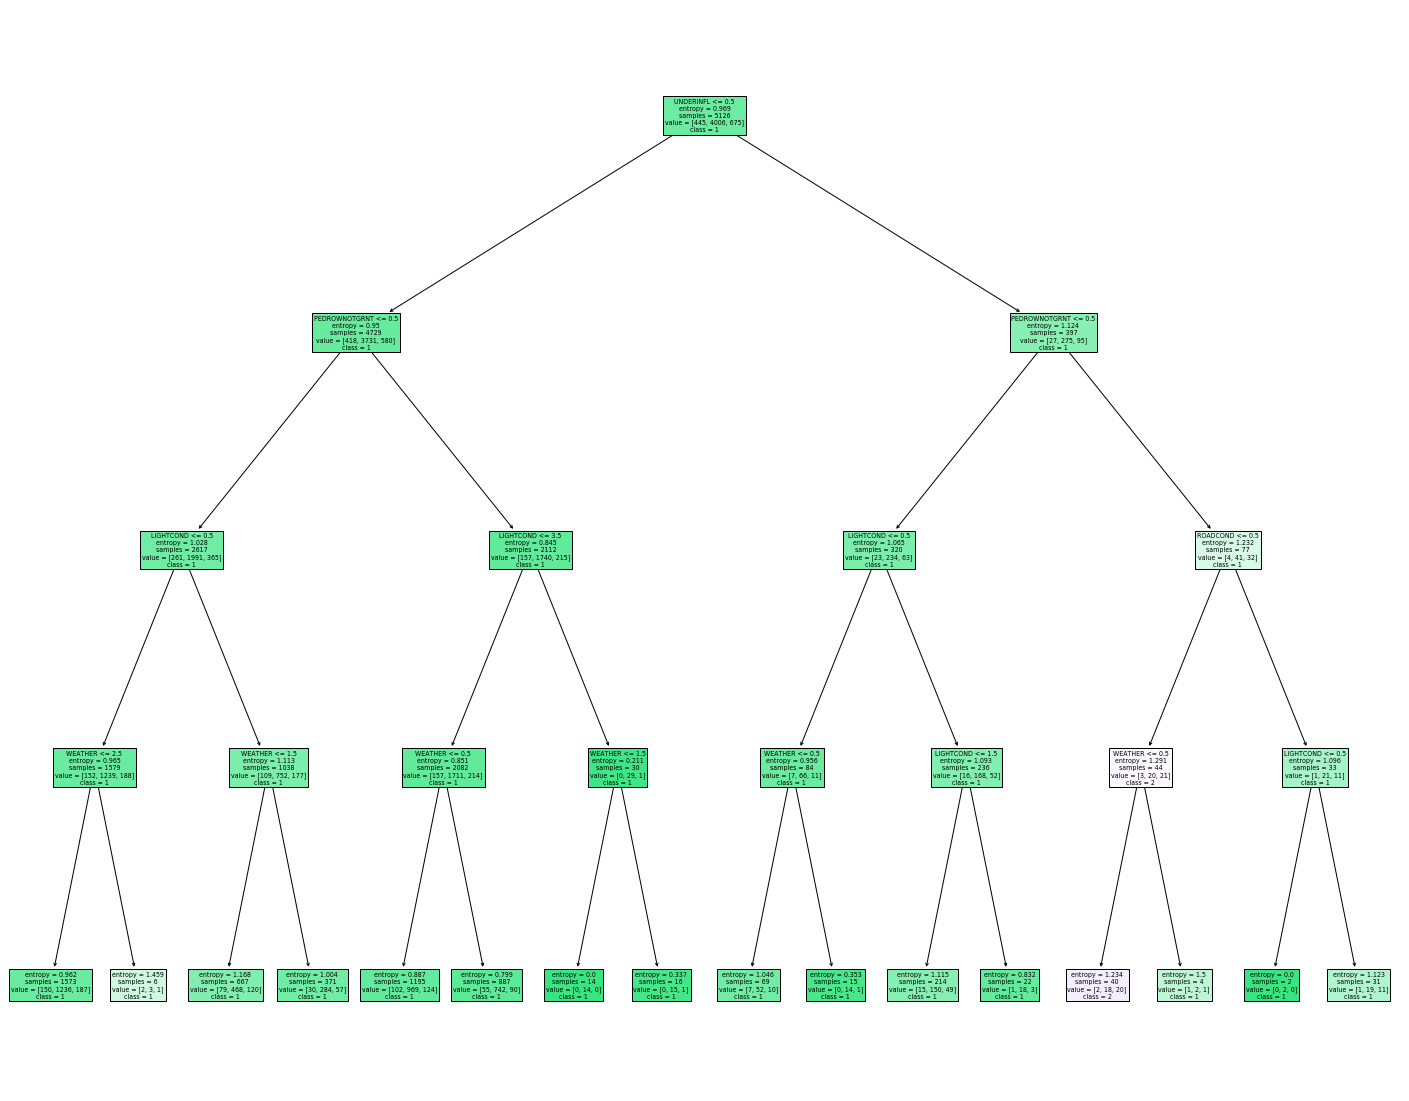

In [371]:
featureNames_unb = ['UNDERINFL', 'WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT']
classNames_unb=['0','1','2']
fig_unb = plt.figure(figsize=(25,20))
_ = tree.plot_tree(crashTree_unbalanced, 
                   feature_names=featureNames_unb,  
                   class_names=classNames_unb,
                   filled=True)
fig_unb.savefig("decistion_tree_un.png")

<h1> Decision tree balanced 1:1 </h1> 
(50% death + serious injuries + property damage / 50% injuries) 

In [372]:
df8['SEVERITYCODE'].value_counts()

1    5741
2     949
0     633
Name: SEVERITYCODE, dtype: int64

In [373]:
df_fatal_serInj = df8.iloc[:948] #Severity code = 2
df_inj = df8.iloc[949:6689] #Severity code = 1
df_prop = df8.iloc[6690:] #Severity code = 0

In [374]:
df_random=df_inj.sample(n = 1582) # 949+633

In [375]:
df_balanced = pd.concat([df_fatal_serInj, df_random, df_prop])  

In [376]:
df_balanced.shape

(3163, 6)

In [377]:
X=df_balanced[['UNDERINFL', 'WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT']].values
X[0:5]

array([['1', '1', '0', '0', '0'],
       ['1', '1', '0', '1', '0'],
       ['0', '1', '1', '2', '0'],
       ['0', '0', '0', '1', '0'],
       ['0', '2', '1', '0', '1']], dtype=object)

In [378]:
y = df_balanced["SEVERITYCODE"]
y[0:5]

221508    2
98197     2
194530    2
194633    2
41190     2
Name: SEVERITYCODE, dtype: object

In [379]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [380]:
print("Size of the X_trainset:", X_trainset.shape)
print("Size od the y_trainset:", y_trainset.shape)
print("Size of the X_testset:", X_testset.shape)
print("Size od the y_testset:", y_testset.shape)

Size of the X_trainset: (2214, 5)
Size od the y_trainset: (2214,)
Size of the X_testset: (949, 5)
Size od the y_testset: (949,)


In [381]:
crashTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
crashTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [382]:
crashTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [383]:
predTree = crashTree.predict(X_testset)

In [384]:
print (predTree [0:5])
print (y_testset [0:5])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

['1' '1' '1' '1' '2']
174562    1
126       1
99366     1
146669    1
60518     1
Name: SEVERITYCODE, dtype: object
DecisionTrees's Accuracy:  0.5163329820864068


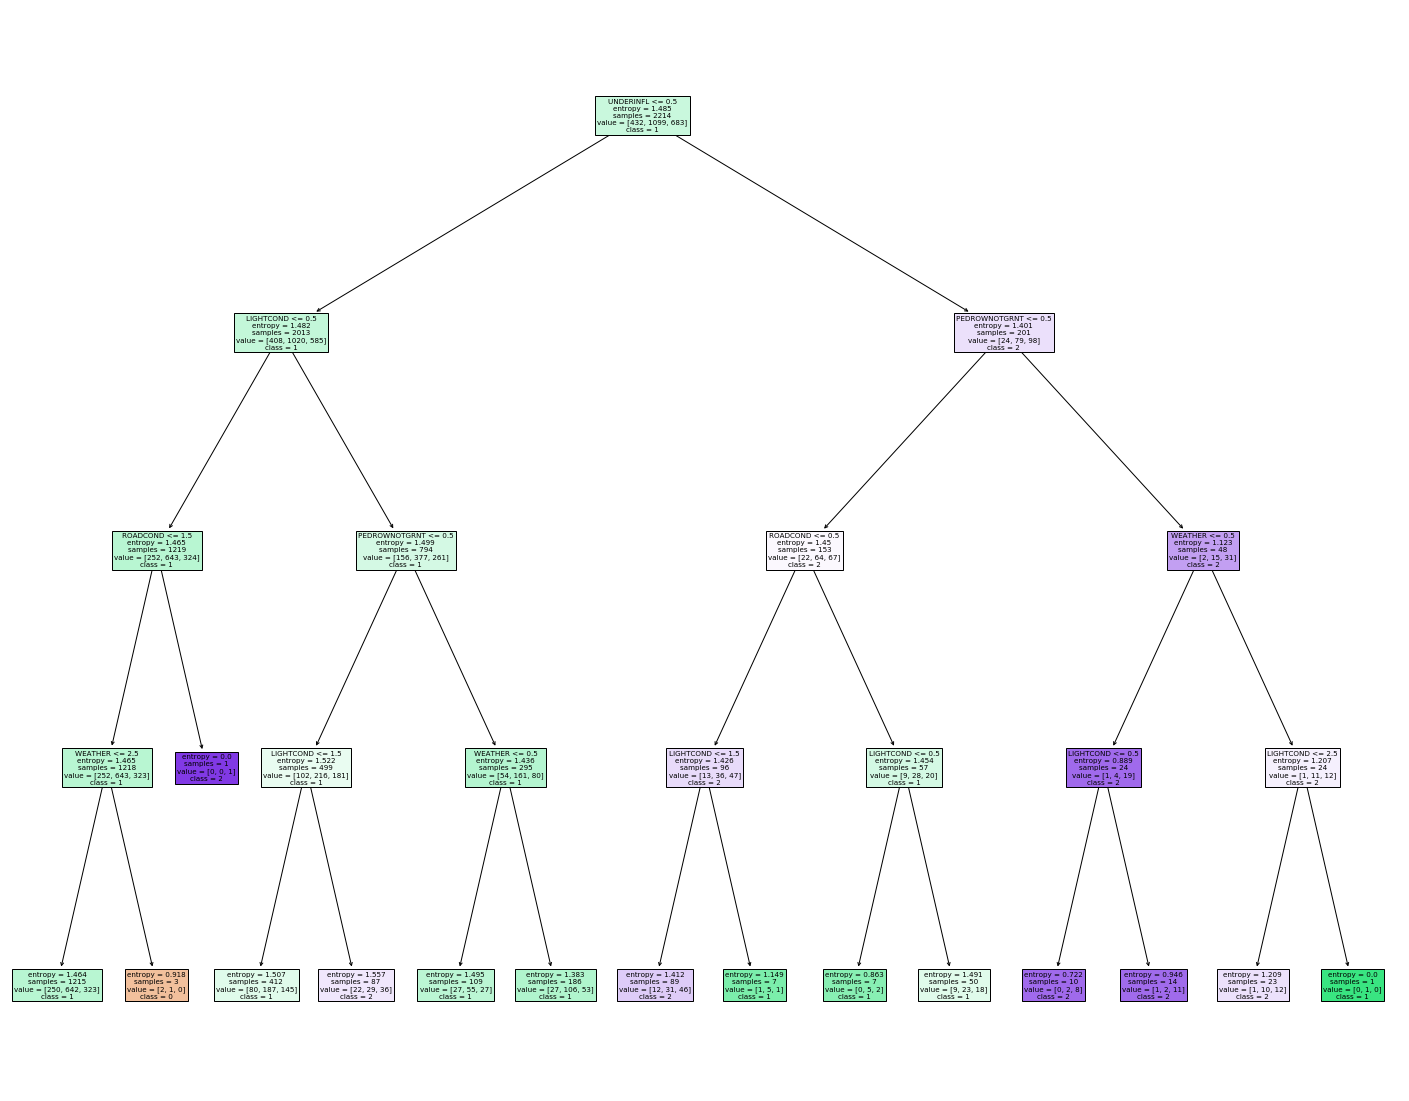

In [385]:
featureNames = ['UNDERINFL', 'WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT']
classNames=['0','1','2']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(crashTree, 
                   feature_names=featureNames,  
                   class_names=classNames,
                   filled=True)
fig.savefig("decistion_tree.png")

<h1> Decision tree balanced 1:2 </h1> 
(death + serious injuries + property damage / doubled injuries) 

In [386]:
df_random_x2=df_inj.sample(n = 3164) # 2*(949+633)

In [387]:
df_balanced_x2 = pd.concat([df_fatal_serInj, df_random_x2, df_prop]) 

In [388]:
df_balanced_x2.shape

(4745, 6)

In [389]:
X_x2=df_balanced_x2[['UNDERINFL', 'WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT']].values
X_x2[0:5]

array([['1', '1', '0', '0', '0'],
       ['1', '1', '0', '1', '0'],
       ['0', '1', '1', '2', '0'],
       ['0', '0', '0', '1', '0'],
       ['0', '2', '1', '0', '1']], dtype=object)

In [390]:
y_x2 = df_balanced_x2["SEVERITYCODE"]
y_x2[0:5]

221508    2
98197     2
194530    2
194633    2
41190     2
Name: SEVERITYCODE, dtype: object

In [391]:
X_x2_trainset, X_x2_testset, y_x2_trainset, y_x2_testset = train_test_split(X_x2, y_x2, test_size=0.3, random_state=3)

In [392]:
print("Size of the X_x2_trainset:", X_x2_trainset.shape)
print("Size od the y_x2_trainset:", y_x2_trainset.shape)
print("Size of the X_x2_testset:", X_x2_testset.shape)
print("Size od the y_x2_testset:", y_x2_testset.shape)

Size of the X_x2_trainset: (3321, 5)
Size od the y_x2_trainset: (3321,)
Size of the X_x2_testset: (1424, 5)
Size od the y_x2_testset: (1424,)


In [393]:
crashTree_x2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
crashTree_x2

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [394]:
crashTree_x2.fit(X_x2_trainset,y_x2_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [395]:
predTree_x2 = crashTree_x2.predict(X_x2_testset)

In [396]:
print (predTree_x2 [0:5])
print (y_x2_testset [0:5])
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_x2_testset, predTree_x2))

['1' '1' '1' '1' '1']
10802     1
58113     0
80522     1
14254     2
201068    1
Name: SEVERITYCODE, dtype: object
DecisionTrees's Accuracy:  0.6741573033707865


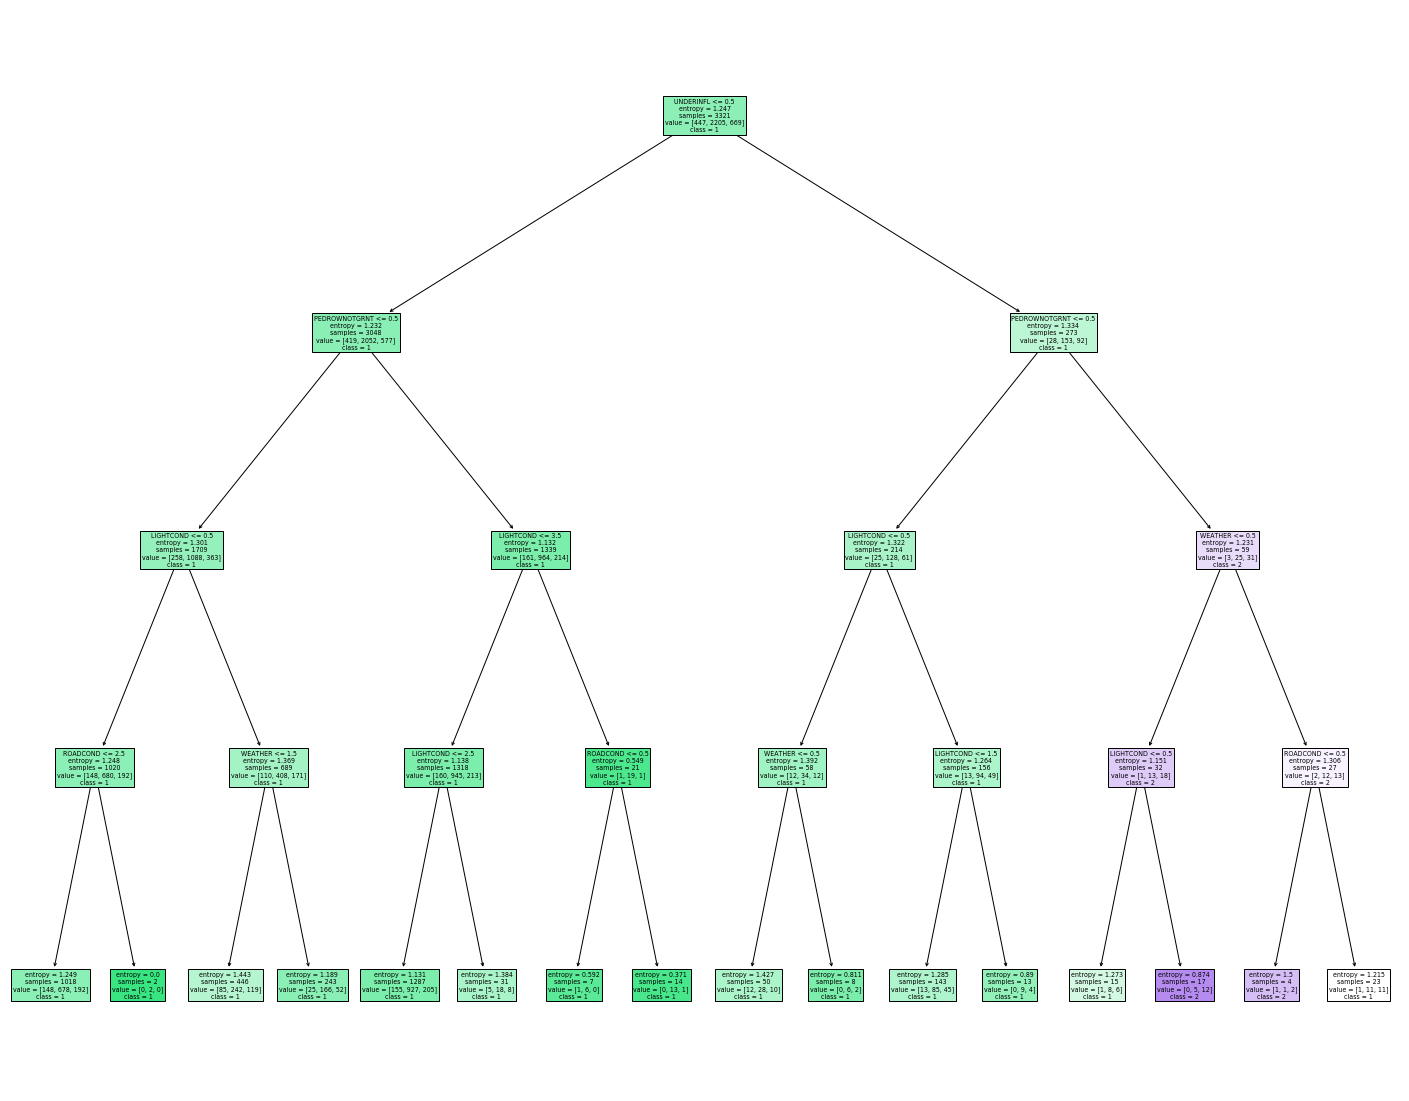

In [397]:
featureNames_x2 = ['UNDERINFL', 'WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT']
classNames_x2=['0','1','2']
fig_x2 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(crashTree_x2, 
                   feature_names=featureNames_x2,  
                   class_names=classNames_x2,
                   filled=True)
fig_x2.savefig("decistion_tree_x2.png")